<a href="https://colab.research.google.com/github/kannasrujana30/heart-disease/blob/main/HEART_DISEASE_PREDICTION(MAJOR_PROJECT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('heart.csv')

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: xlabel='target', ylabel='count'>

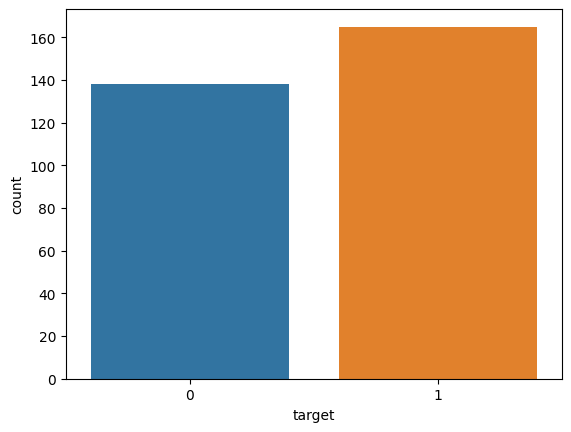

In [ ]:
sns.countplot(x = 'target' , data=dataset)

<Axes: >

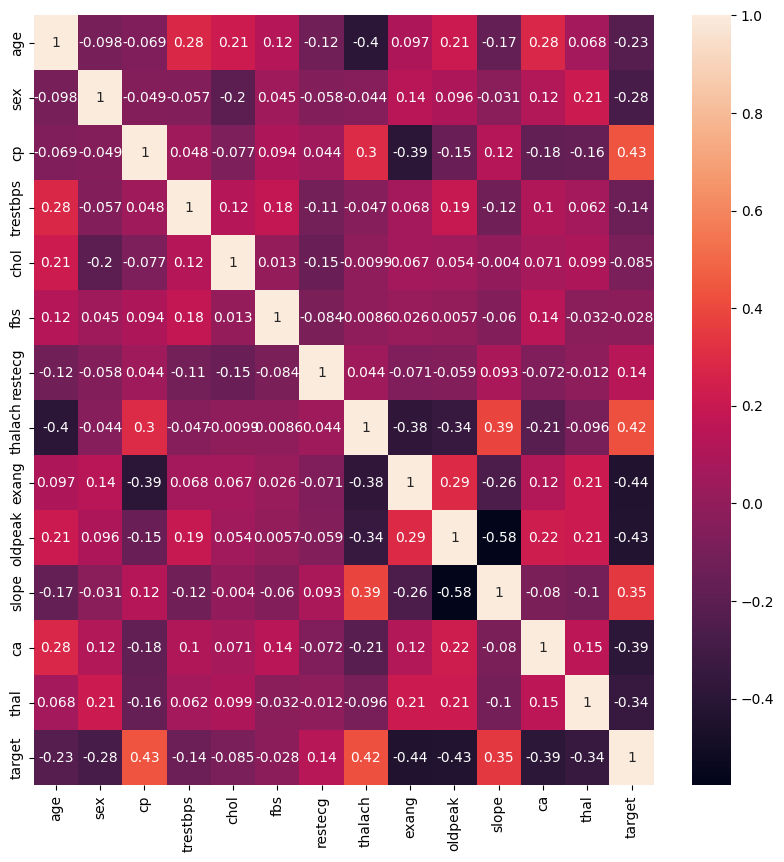

In [ ]:
corr_mat = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat , annot=True)

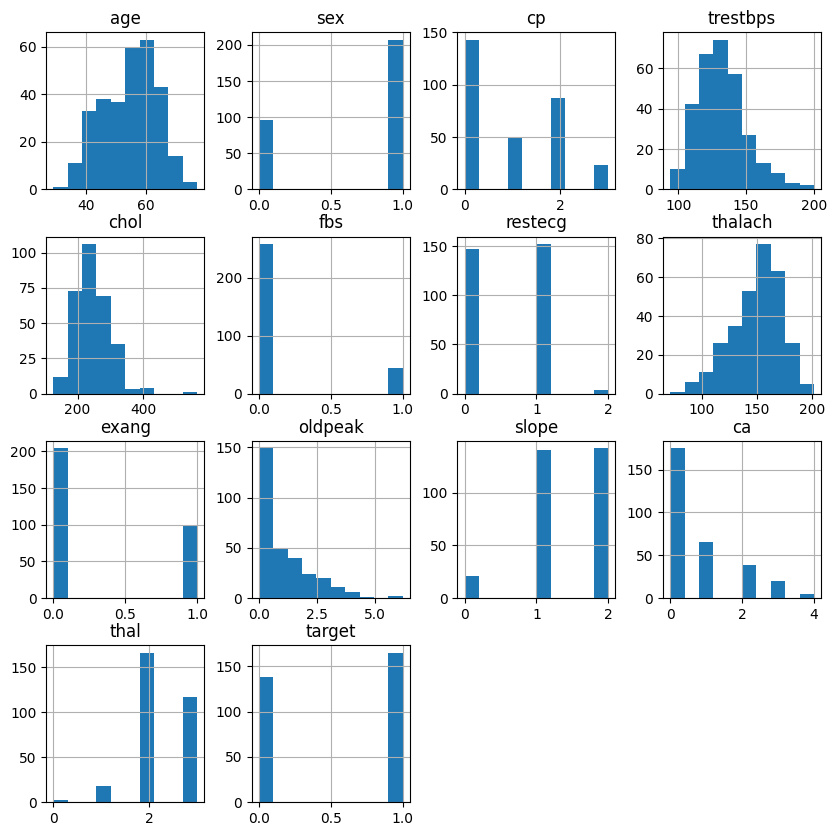

In [ ]:
#plot histograms for each column

dataset.hist(figsize=(10,10))
plt.show()

In [ ]:
dataset2 = pd.get_dummies(dataset , columns=['sex' , 'cp' , 'fbs' , 'restecg' , 'exang' , 'thal' ,'slope' , 'ca'])

In [ ]:
dataset2.head()

In [ ]:
cols = ['cp_0' , 'cp_1' , 'cp_2' , 'cp_3' , 'trestbps' , 'chol' , 'fbs_0' , 'fbs_1' , 'restecg_0' , 'restecg_1' , 'restecg_2' , 'thalach']

In [ ]:
X=dataset2[cols]
y=dataset2.target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X , y ,test_size=0.25 ,random_state =42)

In [ ]:
X_train.shape

(227, 12)

In [ ]:
X_test.shape

(76, 12)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[-0.91139737,  2.34216018, -0.6815542 , ..., -1.04046567,
        -0.13392991,  0.63335882],
       [-0.91139737, -0.42695628,  1.46723474, ...,  0.96110812,
        -0.13392991, -0.69663611],
       [ 1.09721625, -0.42695628, -0.6815542 , ...,  0.96110812,
        -0.13392991,  0.58902565],
       ...,
       [-0.91139737, -0.42695628, -0.6815542 , ..., -1.04046567,
        -0.13392991, -0.8296356 ],
       [ 1.09721625, -0.42695628, -0.6815542 , ..., -1.04046567,
        -0.13392991, -0.25330447],
       [-0.91139737,  2.34216018, -0.6815542 , ...,  0.96110812,
        -0.13392991,  1.29835628]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log.predict(X_test)

In [ ]:
X_test

array([[ 1.09721625, -0.42695628, -0.6815542 , -0.28452132,  1.16826465,
         0.55847168,  0.382707  , -0.382707  ,  1.07791686, -1.04046567,
        -0.13392991, -1.67196572],
       [-0.91139737, -0.42695628, -0.6815542 ,  3.51467512,  2.34508328,
         0.78298125,  0.382707  , -0.382707  ,  1.07791686, -1.04046567,
        -0.13392991,  0.41169299],
       [-0.91139737, -0.42695628,  1.46723474, -0.28452132,  1.16826465,
        -2.24789797, -2.61296502,  2.61296502, -0.92771533,  0.96110812,
        -0.13392991,  1.03235729],
       [ 1.09721625, -0.42695628, -0.6815542 , -0.28452132,  0.22680976,
         3.04678611,  0.382707  , -0.382707  ,  1.07791686, -1.04046567,
        -0.13392991,  0.01269452],
       [-0.91139737, -0.42695628,  1.46723474, -0.28452132, -1.18537259,
         0.35267124, -2.61296502,  2.61296502,  1.07791686, -1.04046567,
        -0.13392991, -0.87396876],
       [-0.91139737, -0.42695628,  1.46723474, -0.28452132,  1.16826465,
        -1.46211447,  

In [ ]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1])

<Axes: >

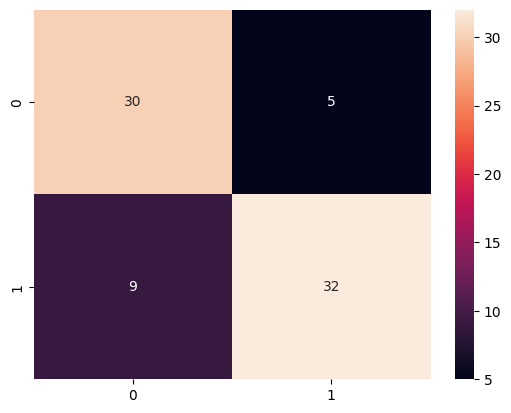

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.8157894736842105

In [ ]:
import pickle
pickle.dump(log , open('model.pkl', 'wb'))
pickle.dump(sc,open('sc.pkl','wb'))

In [ ]:
import pandas as pd


In [ ]:
new_data=pd.DataFrame({
    'age':63,
    'sex':1,
    'cp':3,
    'trestbps':145,
    'chol':233,
    'fbs':1,
    'restecg':0,
    'thalach':150,
    'exang':0,
    'oldpeak':2.3,
    'slope':0,
    'ca':0,
    'thal':1,
    'target':1,
},index=[0])

In [ ]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [ ]:
from sklearn import linear_model
from numpy.random import logistic
p=log.predict(X)
if p[0]==0:
  print('NO HEART DISEASE')
else:
  print('SORRY CONSULT DOCTOR YOU HAVE HEART DISEASE')

SORRY CONSULT DOCTOR YOU HAVE HEART DISEASE


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
